# ME4 Machine Learning - Tutorial 1

## Background

### Multivariate Gussian Model Probability Function:

$$ p(\mathbf{x}) = \frac{1}{(2\pi)^{d/2}\left | \mathbf{\Sigma}  \right |^{1/2}}\textup{exp}\left [ -\frac{1}{2}(\mathbf{x} - \mathbf{\mu} )^{T} \mathbf{\Sigma} ^{-1}\left ( \mathbf{x} - \mathbf{\mu}  \right )  \right ] $$

- ${\mathbf{\Sigma}}$: Convariance matrix
- ${\mathbf{\mu}}$: Mean
- ${d}$: No. of dimensions
- ${\mathbf{x}}$: Coordinate

In [80]:
import sys
# setting path
sys.path.append('..')

from helperlib import (
    mathfunctions as hmath, 
    arrayfunctions as harray) 

import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt

np.random.seed(0)

# Don't show plots inline
%matplotlib agg

In [81]:
fig = plt.figure(figsize=(6, 6))
grid = plt.GridSpec(2, 2)
ax1 = fig.add_subplot(grid[0, :])
ax2 = fig.add_subplot(grid[1, 0])
ax3 = fig.add_subplot(grid[1, 1])
fig.tight_layout(pad=5.0)

## 1. Generate and plot a test dataset.

In [82]:
ax1.set_title("1. Feature Analysis")

Text(0.5, 1.0, '1. Feature Analysis')

Set the feature vectors and the classification vector for the test data.

- Produce two features in your dataset, of which two are informative and zero redundant, with 100 samples.


In [83]:
X, y = datasets.make_classification(
    n_samples=100,
    n_features=2,
    n_informative=2,
    n_redundant=0)

- Make first feature have a mean of 5 and sd of 0.5.
- Make second feature have a mean of 160 and sd of 30.

In [84]:
X[:, 0] = np.abs(X[:, 0] * 0.5 + 5)
X[:, 1] = np.abs(X[:, 1] * 30 + 160)

Plot first and second features on the same axes.

In [85]:
# Set plot limits:
min_x, max_x = min(X[:, 0]), max(X[:, 0])
min_y, max_y = min(X[:, 1]), max(X[:, 1])
ax1.set_xlim(min_x, max_x)
ax1.set_ylim(min_y, max_y)

# First feature:
ax1.scatter(X[y == 0, 0], X[y == 0, 1], c='r')
# Second feature:
ax1.scatter(X[y == 1, 0], X[y == 1, 1], c='b')

Seperate the two features.

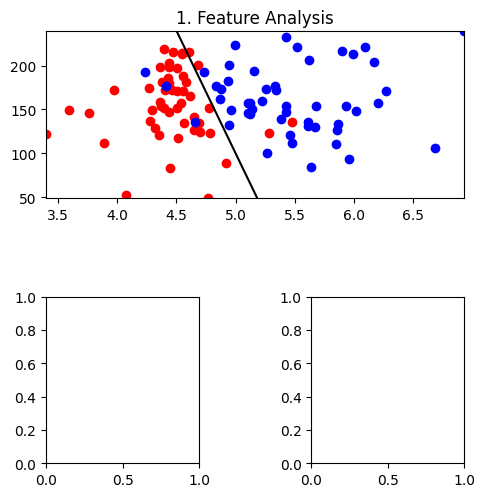

In [86]:
x = np.array([min_x, max_x])
y = -280*x + 1500
ax1.plot(x, y, c='k')
fig

## 2. Make a function to generate a suitable covariance matrix.

In [87]:
ax2.set_title("2. Covariance Analysis")

Text(0.5, 1.0, '2. Covariance Analysis')

Define a function to generate an arbitrary covariance matrix with a rotation:

In [88]:
def get_rotated_covar(sdx=1., sdy=1., theta_deg=0.):
    covar = np.array([[sdx**2, 0], [0, sdy**2]])
    rot_mat = hmath.get_rot_mat(theta_deg, 2)
    covar = hmath.mat_mul([rot_mat, covar, rot_mat.T])
    return covar

Get coordinates of a 200 x 200 square grid ranging from -1 to 1 in x and -1 to 1 in y:

In [89]:
grid_points, x_axis, y_axis = harray.get_grid_points(200, 200, (-1, 1))


Produce a covariance matrix of sd 1 in x and 0.3 in y, then rotate by 30 degrees:

In [90]:
sdx, sdy, theta_deg = 1, 0.3, 30
covar = get_rotated_covar(sdx, sdy, theta_deg)

Calculate [multivariate probability function](#multivariate-gussian-model-probability-function) for every coordinate in the grid:

*Note:* mean is set to zero, ${\mathbf{\mu}} = [0,0]^T$

In [91]:
prob_dist = hmath.p_grid(grid_points, covar)

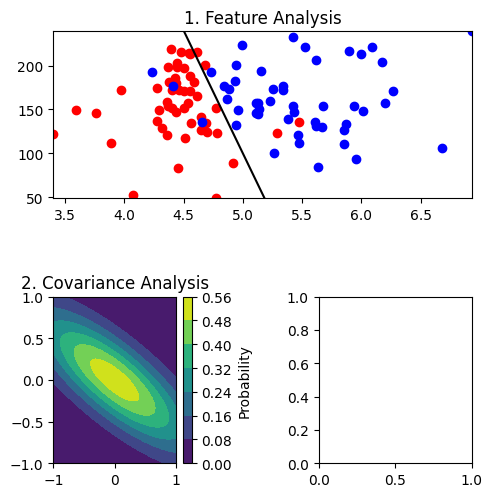

In [92]:
prob_dist_grid = np.reshape(prob_dist, (200, 200))

CS = ax2.contourf(x_axis, y_axis, prob_dist_grid)
cbar = fig.colorbar(CS)
cbar.ax.set_ylabel('Probability')
fig

## 3. Generate a circular distribution